In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

100%|███████████████████████████████████████| 19.6k/19.6k [00:00<00:00, 139kB/s]

Extracting files...
Path to dataset files: /Users/riyaazkhan/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1


In [115]:
import pandas as pd
import numpy as np
import math

In [116]:
df = pd.read_csv(path + '/taxi_trip_pricing.csv')

In [117]:
#Trip_Price = Base_Fare + (Trip_Distance_km *Per_Km_rate) + (Per_minute_rate + Trip_Duration_Minutes)

In [118]:
for i in range(len(df)):
    if math.isnan(df['Base_Fare'][i]):
        if not(math.isnan(df['Trip_Price'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Per_Km_Rate'][i])):
            df['Base_Fare'][i] =  df['Trip_Price'][i] - (df['Per_Minute_Rate'][i]*df['Trip_Duration_Minutes'][i])- (df['Trip_Distance_km'][i] * df['Per_Km_Rate'][i])
        

/var/folders/zh/vm69w9xx2dz7lj6rxj4mc08r0000gn/T/ipykernel_28908/30671022.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Base_Fare'][i] =  df['Trip_Price'][i] - (df['Per_Minute_Rate'][i]*df['Trip_Duration_Minutes'][i])- (df['Trip_Di

In [119]:
for i in range(len(df)):
    if math.isnan(df['Trip_Price'][i]):
        if not(math.isnan(df['Base_Fare'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Per_Km_Rate'][i])):
            df.loc[i,'Trip_Price'] =  df['Base_Fare'][i] + (df['Per_Minute_Rate'][i]*df['Trip_Duration_Minutes'][i])+ (df['Trip_Distance_km'][i] * df['Per_Km_Rate'][i])
        

In [120]:
for i in range(len(df)):
    if math.isnan(df['Trip_Duration_Minutes'][i]):
        if not(math.isnan(df['Base_Fare'][i]) or math.isnan(df['Per_Km_Rate'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Price'][i])):
            df.loc[i,'Trip_Duration_Minutes'] = (df['Trip_Price'][i] - df['Base_Fare'][i] - (df['Trip_Distance_km'][i]*df['Per_Km_Rate'][i]))/df['Per_Minute_Rate'][i]
    

In [121]:
for i in range(len(df)):
    if math.isnan(df['Per_Minute_Rate'][i]):
        if not(math.isnan(df['Base_Fare'][i]) or math.isnan(df['Per_Km_Rate'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Price'][i])):
            df.loc[i,'Per_Minute_Rate'] = (df['Trip_Price'][i] - df['Base_Fare'][i] - (df['Trip_Distance_km'][i]*df['Per_Km_Rate'][i]))/df['Trip_Duration_Minutes'][i]
    

In [122]:
for i in range(len(df)):
    if math.isnan(df['Trip_Distance_km'][i]):
        if not(math.isnan(df['Base_Fare'][i]) or math.isnan(df['Per_Km_Rate'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Trip_Price'][i])):
            df.loc[i,'Trip_Distance_km'] = (df['Trip_Price'][i] - df['Base_Fare'][i] - (df['Per_Minute_Rate'][i]*df['Trip_Duration_Minutes'][i]))/df['Per_Km_Rate'][i]
        

In [123]:
for i in range(len(df)):
    if math.isnan(df['Per_Km_Rate'][i]):
        if not(math.isnan(df['Base_Fare'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Trip_Price'][i])):
            df.loc[i,'Per_Km_Rate'] = (df['Trip_Price'][i] - df['Base_Fare'][i] - (df['Per_Minute_Rate'][i]*df['Trip_Duration_Minutes'][i]))/df['Trip_Distance_km'][i]
        

In [124]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,8.64,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.50,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.32,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [126]:
removablerows = []
for i in range(len(df)):
    if math.isnan(df['Base_Fare'][i]) or math.isnan(df['Trip_Distance_km'][i]) or math.isnan(df['Trip_Duration_Minutes'][i]) or math.isnan(df['Per_Minute_Rate'][i]) or math.isnan(df['Trip_Price'][i]) or math.isnan(df['Per_Km_Rate'][i]) or math.isnan(df['Passenger_Count'][i]):
        removablerows.append(i)

len(removablerows)

81

In [127]:
df = df.drop(index=removablerows)
df = df.reset_index(drop=True)

In [128]:
#Encoding categorical data
rowstorid = []
for i in range(len(df)):
    if df['Time_of_Day'][i] == 'Morning':
        df.loc[i,'Time_of_Day'] = 0
    elif df['Time_of_Day'][i] == 'Afternoon':
        df.loc[i,'Time_of_Day'] = 1
    elif df['Time_of_Day'][i] == 'Evening':
        df.loc[i,'Time_of_Day'] = 2 
    elif df['Time_of_Day'][i] == 'Night':
        df.loc[i,'Time_of_Day'] = 3
    else:
        rowstorid.append(i)
    if df['Day_of_Week'][i] == 'Weekday':
        df.loc[i,'Day_of_Week'] = 0
    elif df['Day_of_Week'][i] == 'Weekend':
        df.loc[i,'Day_of_Week'] = 1
    else:
        rowstorid.append(i)
    if df['Weather'][i] == 'Clear':
        df.loc[i,'Weather'] = 0
    elif df['Weather'][i] == 'Rain':
        df.loc[i,'Weather'] = 1
    else:
        rowstorid.append(i)
        
    if df['Traffic_Conditions'][i] == 'Low':
        df.loc[i,'Traffic_Conditions'] = 0 
    elif df['Traffic_Conditions'][i] == 'Medium':
        df.loc[i,'Traffic_Conditions'] = 1 
    elif df['Traffic_Conditions'][i] == 'High':
        df.loc[i,'Traffic_Conditions'] = 2 
    else:
        rowstorid.append(i)
        
        
rowstorid = list(set(rowstorid))
  
df = df.drop(index=rowstorid)
df = df.reset_index(drop=True)    
        
        
        

KeyError: 0

In [129]:
X = df.drop(columns = ['Trip_Price','Per_Km_Rate','Per_Minute_Rate'])
y = df['Trip_Price']
from sklearn.tree import DecisionTreeRegressor

In [153]:
X

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Trip_Duration_Minutes
0,19.35,0,0,3.0,0,0,3.56,53.82
1,36.87,2,1,1.0,2,0,2.70,37.27
2,8.64,2,0,3.0,2,0,2.93,22.64
3,8.64,1,1,2.0,1,0,2.55,89.33
4,3.85,1,0,4.0,2,1,3.51,5.05
...,...,...,...,...,...,...,...,...
688,5.49,1,1,4.0,1,0,2.39,58.39
689,45.95,3,0,4.0,1,0,3.12,61.96
690,7.70,0,0,3.0,0,1,2.08,54.18
691,47.56,0,0,1.0,0,0,2.67,114.94


In [130]:
from sklearn.model_selection import train_test_split
train_X, val_X,train_y,val_y = train_test_split(X,y,random_state=2)

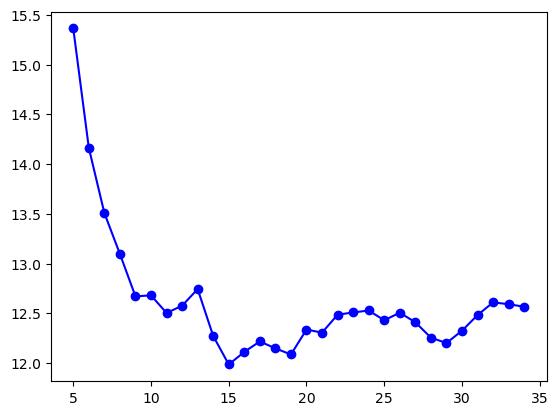

In [136]:
from sklearn.tree import DecisionTreeRegressor
lossvalues = []
X_Values = []
for i in range(30):
    X_Values.append(5+(i))
    model1 = DecisionTreeRegressor(max_leaf_nodes = 5+i,random_state = 1)
    model1.fit(train_X,train_y)
    Predictions = model1.predict(val_X)
    from sklearn.metrics import mean_absolute_error
    Loss = mean_absolute_error(val_y, Predictions)
    lossvalues.append(Loss)

import matplotlib.pyplot as plt

plt.plot(X_Values, lossvalues, label="loss against leaf nodes", color='blue', marker='o')


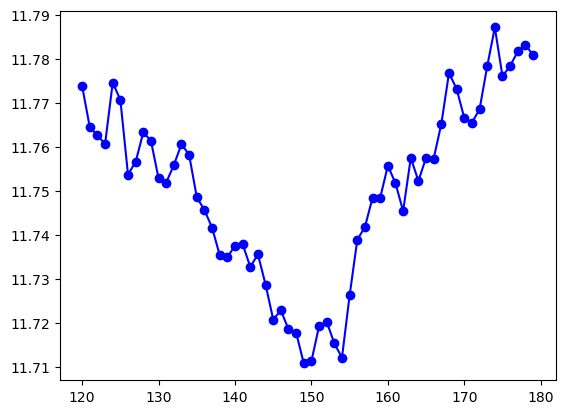

In [142]:
from sklearn.ensemble import RandomForestRegressor
lossvalues = []
X_Values = []
for i in range(60):
    X_Values.append(120+i)
    model2 = RandomForestRegressor(n_estimators =120+i,random_state = 1)
    model2.fit(train_X,train_y)
    Predictions = model2.predict(val_X)
    from sklearn.metrics import mean_absolute_error
    Loss = mean_absolute_error(val_y, Predictions)
    lossvalues.append(Loss)

import matplotlib.pyplot as plt

plt.plot(X_Values, lossvalues, label="loss against leaf nodes", color='blue', marker='o')

In [150]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=150,
                                                              random_state=0))
                             ])


from sklearn.model_selection import cross_val_score


# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')


In [151]:
print(scores)

[11.25805673 14.74015498 11.55908209 12.17486523 11.05227944]


In [156]:
#Neural Networks
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [181]:
model3 = keras.Sequential([
    layers.BatchNormalization(),  
    layers.Dropout(rate=0.2),
    layers.Dense(units=4,activation='relu',input_shape=[8]),
    layers.Dropout(rate=0.35),
    layers.Dense(units=3,activation ='relu'),
    layers.Dense(units=2,activation='relu'),
    layers.Dense(units=1),
])

model3.compile(
    optimizer="adam",
    loss="mae",
)


history = model3.fit(
    X, y,
    batch_size=25,
    epochs=500,
)
history

/Users/riyaazkhan/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 54.2457
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.1360
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.3740
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.9103
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.2221
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.7535
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.6463
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.6819
Epoch 9/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.7501
Epoch 10/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.7393
Epoch 11/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.2033
Epoch 12/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.5601
Epoch 13/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.2590
Epoch 14/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.4557
Epoch 15/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.0583
Epoch 82/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.9926
Epoch 83/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.6876
Epoch 84/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.2195
Epoch 85/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.0087
Epoch 86/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.6744
Epoch 87/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.4641
Epoch 88/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.3415
Epoch 89/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.4354
Epoch 90/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.3539
Epoch 91/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.7196
Epoch 92/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.8793
Epoch 93/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.0879
Epoch 94/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.8090
Epoch 95/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.2656
Epoch 161/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6396
Epoch 162/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.3777
Epoch 163/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.2115
Epoch 164/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9175
Epoch 165/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.7001
Epoch 166/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.3671
Epoch 167/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.4837
Epoch 168/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6397
Epoch 169/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.4407
Epoch 170/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.5755
Epoch 171/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.1434
Epoch 172/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.2404
Epoch 173/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.0934
Epoch 174/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.5557
Epoch 240/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0222
Epoch 241/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.0339
Epoch 242/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6566
Epoch 243/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.2217
Epoch 244/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9994
Epoch 245/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.5603
Epoch 246/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5421
Epoch 247/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.9646
Epoch 248/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.0025
Epoch 249/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.9167
Epoch 250/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.6716
Epoch 251/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.1173
Epoch 252/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.8963
Epoch 253/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.2485
Epoch 319/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.0033
Epoch 320/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.0947
Epoch 321/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.1562
Epoch 322/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.0388
Epoch 323/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.2797
Epoch 324/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5321
Epoch 325/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5040
Epoch 326/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3724
Epoch 327/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9043
Epoch 328/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.8382
Epoch 329/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1157
Epoch 330/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.5773
Epoch 331/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3501
Epoch 332/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6259
Epoch 398/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1506
Epoch 399/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.7037
Epoch 400/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.7611
Epoch 401/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.6970
Epoch 402/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.5124
Epoch 403/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6453
Epoch 404/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0180
Epoch 405/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.6131
Epoch 406/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.0962
Epoch 407/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.8021
Epoch 408/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6301
Epoch 409/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.8640
Epoch 410/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.8404
Epoch 411/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.4374
Epoch 477/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.6897
Epoch 478/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.5178
Epoch 479/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.7569
Epoch 480/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2524
Epoch 481/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.9113
Epoch 482/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.0164
Epoch 483/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.3905
Epoch 484/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0968
Epoch 485/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9140
Epoch 486/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.9443
Epoch 487/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.3567
Epoch 488/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.7131
Epoch 489/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6396
Epoch 490/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

AttributeError: 'History' object has no attribute 'type'